In [1]:
import math
from decimal import *

# общий кусочек вычислений, который заменяет деление 2 больших чисел
def common(M, K, N, α):
    result = Decimal(1)
    for i in range(1, M+1):
        result *= Decimal(α ** K - M + i) / Decimal(N - M + i)
    return result

# вероятность без коллизий - нижняя оценка
def P_lo(M, K, N, α=26):
    if α ** K < M:
        return Decimal(0.0)   # пользователей больше, чем разных кодов
    if α ** K >= N:
        return Decimal(1.0)   # кодов хватит на каждого пользователя
    return common(M, K, N, α) * (math.floor(N / α ** K) ** M)

# верхняя оценка
def P_hi(M, K, N, α=26):
    if α ** K < M:
        return Decimal(0.0)   # пользователей больше, чем разных кодов
    if α ** K >= N:
        return Decimal(1.0)   # кодов хватит на каждого пользователя
    return common(M, K, N, α) * (math.ceil(N / α ** K) ** M)


N = 26 ** 4 * 2               # ~900K
X = list(range(1, 10000+1, 5))
P = {}
for K in range(1, 5+1):
    P[K] = [ P_lo(M, K, N) for M in X ]

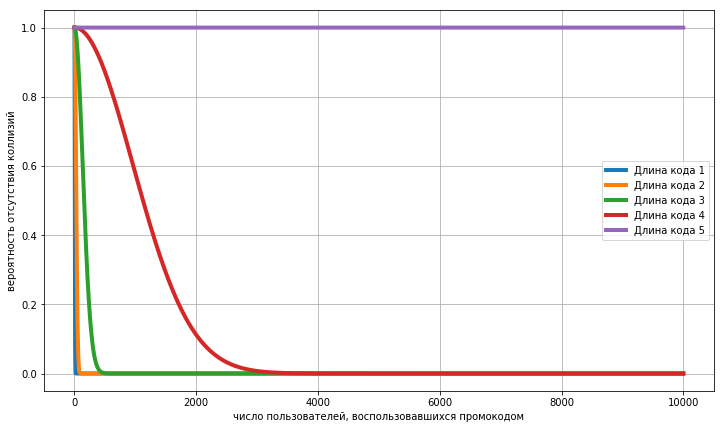

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 7))
for i in P.keys():
    plt.plot(X, P[i], label="Длина кода " + str(i), linewidth=4)
plt.legend()
plt.grid(True)
plt.xlabel('число пользователей, воспользовавшихся промокодом')
plt.ylabel('вероятность отсутствия коллизий')
plt.show()